In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Working with life-tables and the Euler-Lotka equation
### Erol Akcay
Department of Biology, University of Pennsylvania

Bio 417 Spring 2019

Let's import some age-structured data. For that, go to the human lifetable database at http://www.lifetable.de/ and download one of the lifetable data files (as .txt files, which come in comma separated value, or csv format). Then import the pandas package, which deals efficiently with dataframes

In [6]:
import pandas as pd

This reads the csv file into a pandas dataframe. In our case, I downloaded the US total population lifetable from 2005 for the entire population. (You first need to download the same file from the address above and save it in your working directory to run the code below)

In [7]:
usdem=pd.read_csv('USA000020052005CU1.txt', skipinitialspace=True) #reads the file into Python and assigns it to a variable. The stripinitialspace option gets rid of the whitespace in front of the strings in column headers, which otherwise are very annoying. 
usdem ## Prints a condensed version of the entire dataset

,Country,Year1,Year2,TypeLT,Sex,Age,AgeInt,m(x),q(x),l(x)*,d(x),L(x)*,T(x),e(x)
0,USA0000,2005,2005,1,1,0,1,0.00762,0.00757,100000,757,99338,7485713,74.86
1,USA0000,2005,2005,1,1,1,1,0.00051,0.00051,99243,51,99218,7386375,74.43
2,USA0000,2005,2005,1,1,2,1,0.00035,0.00035,99192,35,99175,7287157,73.47
3,USA0000,2005,2005,1,1,3,1,0.00025,0.00025,99157,25,99144,7187982,72.49
4,USA0000,2005,2005,1,1,4,1,0.00021,0.00021,99132,21,99121,7088838,71.51
5,USA0000,2005,2005,1,1,5,1,0.00019,0.00019,99111,19,99101,6989717,70.52
6,USA0000,2005,2005,1,1,6,1,0.00017,0.00017,99092,17,99083,6890616,69.54
7,USA0000,2005,2005,1,1,7,1,0.00016,0.00016,99075,16,99067,6791533,68.55
8,USA0000,2005,2005,1,1,8,1,0.00014,0.00014,99059,14,99052,6692466,67.56
9,USA0000,2005,2005,1,1,9,1,0.00011,0.00011,99045,11,99039,6593414,66.57


Now, let's focus on the females (Sex=2). The data ewe loaded actually includes lifetables calculated in 4 different ways, which we don't really care much about right now, so we want to extract the elements that have TypeLT=1 and Sex=2. 

In [8]:
usdem.columns

Index(['Country', 'Year1', 'Year2', 'TypeLT', 'Sex', 'Age', 'AgeInt', 'm(x)',
       'q(x)', 'l(x)*', 'd(x)', 'L(x)*', 'T(x)', 'e(x)'],
      dtype='object')

In [9]:
femusdem=usdem.loc[(usdem['TypeLT'] == 1) & (usdem['Sex'] == 2) & (usdem['AgeInt']==1)]

Now this table still has too much data, we only want the age, maternity and survivorship functions, and we want them as a numpy array, so use the as_matrix functionality of pandas to extract those columns and assign it to a numpy array

In [10]:
femusdem

,Country,Year1,Year2,TypeLT,Sex,Age,AgeInt,m(x),q(x),l(x)*,d(x),L(x)*,T(x),e(x)
101,USA0000,2005,2005,1,2,0,1,0.00619,0.00616,100000,616,99460,7993933,79.94
102,USA0000,2005,2005,1,2,1,1,0.00040,0.00040,99384,40,99364,7894473,79.43
103,USA0000,2005,2005,1,2,2,1,0.00026,0.00026,99344,26,99331,7795109,78.47
104,USA0000,2005,2005,1,2,3,1,0.00018,0.00018,99318,18,99309,7695778,77.49
105,USA0000,2005,2005,1,2,4,1,0.00016,0.00016,99300,16,99292,7596469,76.50
106,USA0000,2005,2005,1,2,5,1,0.00015,0.00015,99284,15,99277,7497177,75.51
107,USA0000,2005,2005,1,2,6,1,0.00014,0.00014,99269,14,99262,7397900,74.52
108,USA0000,2005,2005,1,2,7,1,0.00013,0.00013,99255,13,99248,7298638,73.53
109,USA0000,2005,2005,1,2,8,1,0.00013,0.00013,99242,13,99235,7199390,72.54
110,USA0000,2005,2005,1,2,9,1,0.00011,0.00011,99229,11,99223,7100155,71.55


In [25]:
ltarray=femusdem[['Age','l(x)*']].to_numpy();

Let's plot the survivorship function

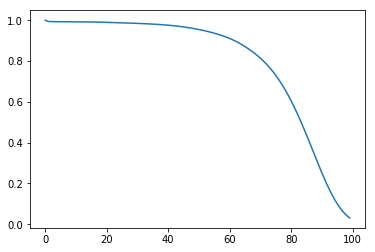

In [26]:
plt.plot(ltarray[:,0],ltarray[:,1]/ltarray[0,1])

Now let's import the fertility function. I've downloaded the fertility table for US females in 2005 from CDC: https://www.cdc.gov/nchs/nvss/cohort_fertility_tables.htm (I use Table01.xlsx and converted to .csv), which gives data for reproductive age women in 2005

In [27]:
fertdf=pd.read_csv('Table01.csv',header=5,skipinitialspace=True)
fertdf.columns

Index(['Race of women and calendar year', 'Current age of women',
       'Cohort birth year', 'Total', '1', '2', '3', '4', '5', '6', '7',
       '8 and higher'],
      dtype='object')

In [28]:
fertallrace=fertdf.loc[(fertdf['Race of women and calendar year']=='2005')][0:(50-14)] # take the first set of data (all races) only
fertallrace=fertallrace.replace('*',0) #replace the string '*' for missing value in the original set with 0
fertallrace=fertallrace.apply(pd.to_numeric) #convert numerical values somehow saved as strings to numbers (data cleaning, essentially)
fertarray=fertallrace.to_numpy() #convert dataframe to numpy array

Now we need to calculate the number of childs per woman of different ages. The array we just converted to lists the number of women (per 1000) that have 1,2,3, etc. kids. So we just need to multiply the number under columns 1,2,3, etc. divided by 1000, with 1,2,3, etc., and sum all those numbers. The line below does that operation elegantly using a feature of Python called list comprehension (the square brackets inside the np.sum() function). List comprehension is a useful way to make lists or arrays that are function of some index.

In [29]:
marray=np.sum([fertarray[:,i]*(i-3)/1000 for i in range(4,11)],axis=0) 
marray

array([0.0038, 0.0109, 0.0238, 0.0441, 0.0737, 0.1052, 0.1375, 0.1636,
       0.1849, 0.2016, 0.2139, 0.2257, 0.2378, 0.2472, 0.2519, 0.2518,
       0.2468, 0.2365, 0.2218, 0.2045, 0.1844, 0.1628, 0.1391, 0.1137,
       0.0902, 0.0681, 0.0486, 0.0342, 0.022 , 0.013 , 0.0077, 0.004 ,
       0.0016, 0.0006, 0.0003, 0.    ])

The array above now gives the expected number of offspring born to women at age 14,15,etc.

In [30]:
marray=np.pad(marray,(14,50),mode='constant',constant_values=0)

In [31]:
len(marray) #checking that marray now has the right size

100

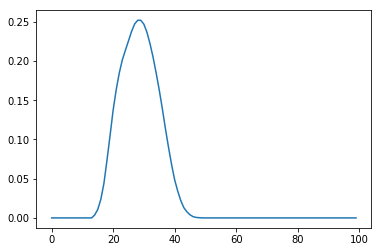

In [32]:
plt.plot(marray) ## plotting the fertility function

We're almost done. We just need to define the Euler-Lotka equation (discrete version) to solve it. It will take as argument the numpy array we just constructed.

In [33]:
def eullot(r, larray, array):
    f = larray[:,1]*marray/larray[0,1] #multiply the maternity and survivorship vectors; the division at the end if to normalize l(x).
    return np.sum(f*np.exp(-r*larray[:,0]))-1 

Now we need to import another function, from the scipy.optimize package, we nefunction brentq, which finds the root of a function

In [34]:
from scipy.optimize import brentq

In [35]:
a, b = -2, 2 #set the limits for searching for the root
r = brentq(eullot, a, b, args=(ltarray,marray))
r

0.051357186049141176

So, r for the US is slightly greater than zero, which means that the US is actually growing in population size. 

In [36]:
np.exp(.05)

1.0512710963760241

We can also compute and plot the stable age distribution

In [37]:
stableage=[np.exp(-r*i)*ltarray[:,1][i] for i in range(len(ltarray[:,1]))]

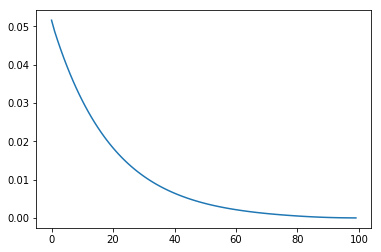

In [38]:
plt.plot(stableage/np.sum(stableage))